<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第6课 使用Python和pandas统计入门 - 作业 </h1>

某个国家想为9年级学生删去一些预修课程。9年级一共有156577名学生在上这些课程。作为一个数据科学家，你需要去决定哪些课程需要保留，哪些需要删除。为此，你需要统计一些数据，并且以直方图形式展示，最后给出你的答案。


<h2, align=center>获得数据</h2>

现在，我们先通过下面链接得到csv数据文件

In [17]:
!wget --output-document ./Grade9.csv https://ibm.box.com/shared/static/nx0f9mgmw2d1ysgyj9d77focjejxs849.csv
#自行下载

--2017-11-24 13:39:38--  https://ibm.box.com/shared/static/nx0f9mgmw2d1ysgyj9d77focjejxs849.csv
正在解析主机 ibm.box.com (ibm.box.com)... 107.152.24.197
正在连接 ibm.box.com (ibm.box.com)|107.152.24.197|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://ibm.ent.box.com/shared/static/nx0f9mgmw2d1ysgyj9d77focjejxs849.csv [跟随至新的 URL]
--2017-11-24 13:39:39--  https://ibm.ent.box.com/shared/static/nx0f9mgmw2d1ysgyj9d77focjejxs849.csv
正在解析主机 ibm.ent.box.com (ibm.ent.box.com)... 107.152.24.211
正在连接 ibm.ent.box.com (ibm.ent.box.com)|107.152.24.211|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://public.boxcloud.com/d/1/PLbJxjqxDnrCD1065ybthQ09pMLYLunyt4Fpkr5C2noumoPr7a929on3W78nZDVK-3CjJ9kMeOuQh9OV8ruFR3u8N7wkT4_Uh6NdBtHxK7anbsNKzJc7ifTK1a6OQYcMfBJWhGymGZC3SrSNgTJ0CNa9_hi6s2C9p-VbTTr5kVSk-VSg8RinP_t4glzEvC6vtRMT9aupyro0pLKHIEixNM0ZUf0jizJ9eT0vPTmrEuz26etEe3cgcEALLF_bU_87UauvS0uY_72W5cwSjiUzDOKALENb_5GgBevQhNu336e6N71m2UOczncy7P40i3TIl-ocK1Zct1gMP785Kmx5zFBIAOroUtnKi5CXutN9Ke4iOjj

### 载入所需的 `pandas` 库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline 

#### 使用`pd.read_csv` 导入数据

数据中，第一列代表课程名，第二列代表课程的学生人数

In [2]:
#linux StudentInfo = pd.read_csv('/resources/data/Grade9.csv')
StudentInfo = pd.read_csv('./Grade9.csv')

### 清洗数据

In [3]:
Names=StudentInfo[['Unnamed: 0']].values.flatten()
StudentInfo=StudentInfo.set_index(Names)
del StudentInfo['Unnamed: 0']

In [4]:
StudentInfo

,Students (9th Grade)
ART HISTORY,345
BIOLOGY,3995
CALCULUS AB,727
CALCULUS BC,451
CHEMISTRY,338
CHINESE LANGUAGE & CULTURE,1456
COMPUTER SCIENCE A,1365
MACROECONOMICS,557
MICROECONOMICS,520
ENGLISH LANGUAGE & COMPOSITION,334


 1) 所有课程的学生平均数是多少？

In [5]:
StudentInfo.mean()

Students (9th Grade)    4349.361111
dtype: float64

<div align="right">
<a href="#mean" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>

<div id="mean" class="collapse">
StudentInfo.mean()
</div>

2) 学生人数的中位数是多少？

In [6]:
StudentInfo.median()

Students (9th Grade)    341.5
dtype: float64

<div align="right">
<a href="#median" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="median" class="collapse">
StudentInfo.median()
</div>

3) 为什么中位数和平均数相差大？

In [ ]:
有很多离群值，对平均数有一定影响

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q3" class="collapse">
 平均数容易受离群值（边缘值）影响
</div>

4) 现在你还觉得应该保留所有课程么？

In [ ]:
不应该，平均数是4349，中位数是350，说明有一半的课程350人不到，有几门课程占据了大部分学生

<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q4" class="collapse">
不，中位数是350，但是平均是4349。这意味着一半课程都只有350不到的人，而少部分课程占了大量的学生。
</div>

5) 标准差是多少？

In [7]:
StudentInfo.std()

Students (9th Grade)    19188.817443
dtype: float64

<div align="right">
<a href="#q6" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q6" class="collapse">
 StudentInfo.std()
</div>

6) 学生人数的最大值是多少？

In [8]:
StudentInfo.max()

Students (9th Grade)    115711
dtype: int64

<div align="right">
<a href="#q7" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q7" class="collapse">
StudentInfo.max()
</div>

7) 通过中位数和最大值解释为什么标准差如此巨大？

<div align="right">
<a href="#q8" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q8" class="collapse">
最大值远大于中位数
</div>


8) 使用直方图展示数据

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc6060d4e0>]], dtype=object)

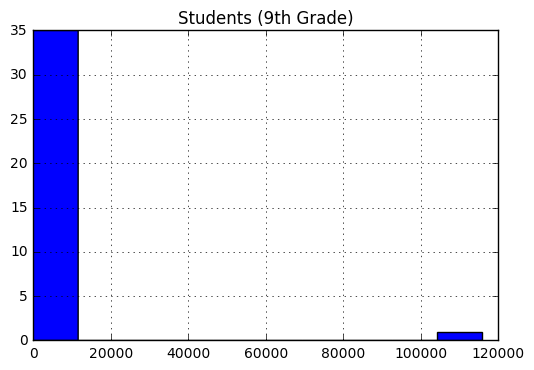

In [9]:
StudentInfo.hist()

<div align="right">
<a href="#q9" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q9" class="collapse">
StudentInfo.hist()
</div>


学生人数最多的课程名是什么？

In [10]:
StudentInfo.idxmax(axis=0)

Students (9th Grade)    HUMAN GEOGRAPHY
dtype: object

9) 如果需要只想保留一门课，那是哪门课？ 

In [12]:
StudentInfo.idxmax(axis=0)

Students (9th Grade)    HUMAN GEOGRAPHY
dtype: object

<div align="right">
<a href="#q11" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q11" class="collapse">
HUMAN GEOGRAPHY
</div>
